In [1]:
import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.datasets import make_blobs, make_moons, make_circles

from sklearn.linear_model import SGDOneClassSVM 

# Customize font settings (e.g., using 'serif' font)
plt.rcParams.update({
    'font.family': 'sans-serif',     # Font family (serif, sans-serif, etc.)
    'font.size': 16,            # Font size
    'font.weight': 'normal',      # Font weight (normal, bold, etc.)
    'axes.titlesize': 16,       # Title font size
    'axes.labelsize': 14,       # Axis labels font size
    'xtick.labelsize': 12,      # X-axis tick label size
    'ytick.labelsize': 12       # Y-axis tick label size
})


(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1797,)


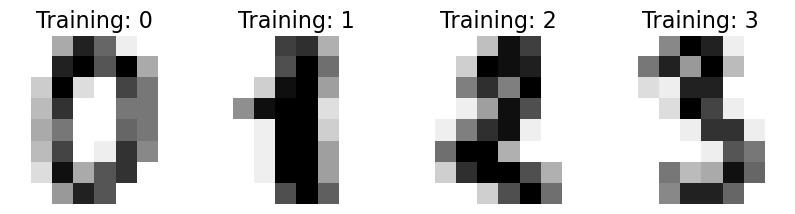

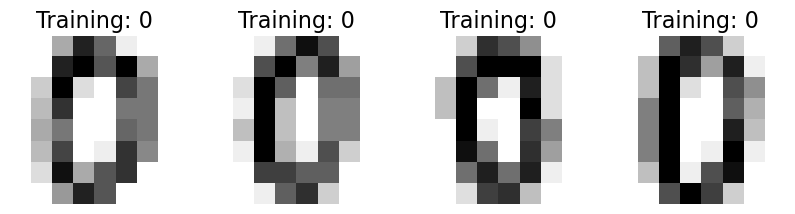

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    
# flatten images from 2D to 1D 64 arrays
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)
print(data[0])
print(digits.target.shape)
zero_targets = digits.target[digits.target == 0]
zeros = data[digits.target == 0]
zeros_images = zeros.reshape((len(zeros), 8, 8))

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, zeros_images, zero_targets):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    




In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
p_train = 0.8
n_points = len(zeros)
n_train = int(n_points * 0.8)
n_test = n_points - n_train
X_train = zeros[:n_train]
X_test = zeros[n_train:]

# %% Normalize the features based on mean and std of train set.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_samples = n_train
outliers_fraction = 0.01
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

    
osvm = svm.OneClassSVM(nu = outliers_fraction, kernel = "rbf")
osvm.fit(X_train)
y_pred = osvm.predict(X_test)
print(y_pred)

train_images = X_test.reshape((len(X_test), 8, 8))

#_, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
#for ax, image, label in zip(axes.ravel(), train_images, y_pred):
#    ax.set_axis_off()
#    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#    ax.set_title("Prediction: %i" % label)
    
y_pred_scaled = (y_pred + 1) / 2
y_true = np.array([1 for _ in range(len(y_pred))])
target_names = ["class 0", "class 1"]
print(y_true)
print(y_pred_scaled)
report= classification_report(y_true, y_pred_scaled, target_names = target_names)
print(report)

print(confusion_matrix(y_true, y_pred_scaled, labels=[0, 1], normalize= "true"))


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         0
     class 1       1.00      0.86      0.93        36

    accuracy                           0.86        36
   macro avg       0.50      0.43      0.46        36
weighted avg       1.00      0.86      0.93        36

[[0.         0.        ]
 [0.13888889 0.86111111]]


/Users/guifre/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guifre/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guifre/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version = 1)


In [7]:
# Data and Labels
X, y = mnist.data, mnist.target

# Shape of the data
print("Feature matrix shape:", X.shape)  # (70000, 784) -> 70,000 samples, 28x28 pixels flattened to 784 features
print("Labels shape:", y.shape)          # (70000,)

# Example: View the first label
print("First label:", y[0])   

# Labels are strings; convert to integers if needed.
n_points = len(X)
data = np.array(X)
target = np.array(y)
print(data.shape)
i = 0
zeros = data[target == '0']
zeros_targets = target[target == '0']
n_zeros = len(zeros)
zeros_images = zeros.reshape((n_zeros, 28, 28))
print(zeros.shape)
print(zeros_images.shape)
    



Feature matrix shape: (70000, 784)
Labels shape: (70000,)
First label: 5
(70000, 784)
(6903, 784)
(6903, 28, 28)


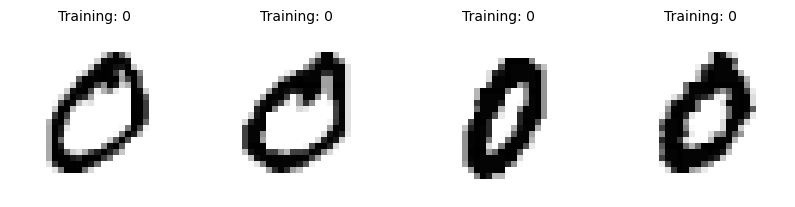

In [51]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, zeros_images, zero_targets):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [37]:
import random
n_zeros = 2000
n_test = 3000
random.seed(40)
test_start = random.randint(10000, 50000)
x_train = zeros[:n_zeros]
x_test = data[test_start:test_start + n_test]
y_test = target[test_start:test_start + n_test]

scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

x_train_scaled = x_train
x_test_scaled = x_test


c = 0.5 * 256
nu = 0.05

osvm = svm.OneClassSVM(nu = nu, kernel = "rbf")
osvm.fit(x_train_scaled)
y_pred = osvm.predict(x_test_scaled)
f_pred = osvm.decision_function(x_test_scaled)
print("Decision function value on test data: ", f_pred[0])
#print(y_pred)

test_images = x_test.reshape((n_test, 28, 28))

# Customize font settings (e.g., using 'serif' font)
plt.rcParams.update({
    'font.family': 'sans-serif',     # Font family (serif, sans-serif, etc.)
    'font.size': 12,            # Font size
    'font.weight': 'normal',      # Font weight (normal, bold, etc.)
    'axes.titlesize': 10,       # Title font size
    'axes.labelsize': 10,       # Axis labels font size
    'xtick.labelsize': 6,      # X-axis tick label size
    'ytick.labelsize': 6       # Y-axis tick label size
})


y_test_pred = []

for i in range(n_test):
    y_test_pred.append([int(y_test[i]), y_pred[i]])

y_test_pred = np.array(y_test_pred)
    
#image_size = 1
#nrows = 2
#ncols = 2
#_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(image_size * nrows, image_size * ncols))
#for ax, image, label in zip(axes.ravel(), test_images, y_test_pred):
#    ax.set_axis_off()
#    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#    ax.set_title(" %i / %i" % (label[0], label[1]))
    

#image_size = 1
#nrows = 2
#ncols = 2
#zeros_test = test_images[y_test == '0']
#zeros_y_test = y_test[y_test == '0']
#_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(image_size * nrows, image_size * ncols))
#for ax, image, label in zip(axes.ravel(), zeros_test, zeros_y_test):
#    ax.set_axis_off()
#    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#    ax.set_title(label)
    
y_test_anomaly = []
for y in y_test:
    normal_class = 1
    if y != '0':
        normal_class = -1
    y_test_anomaly.append(normal_class)
    
# Fraction of 0s correctly identified
n_zeros_test = len(y_test[y_test == '0'])
i = 0
true_zero = 0
indices_true_zeros = []
indices_false_zeros = []
for y in y_test:
    if y == '0' and y_pred[i] == 1:
        true_zero += 1
        indices_true_zeros.append(i)
    if y == '0' and y_pred[i] == -1:
        indices_false_zeros.append(i)
    i += 1
    

fraction = true_zero / n_zeros_test
print("Total number of 0s in test set: ", n_zeros_test)
print("Number of 0s wrongly classified as non-zero: ", n_zeros_test - true_zero)
print("Fraction of 0's correctly identified: ", fraction)

    
#print(y_test[:10])
#print(y_test_anomaly[:10])

#confusion_matrix(y_test_anomaly, y_pred, normalize= 'true')
metrics = classification_report(y_test_anomaly, y_pred, target_names = ['normal class', 'outlier class'], labels = [1, -1])
print(metrics)






Decision function value on test data:  -0.7877541063681797
Total number of 0s in test set:  315
Number of 0s wrongly classified as non-zero:  22
Fraction of 0's correctly identified:  0.9301587301587302
               precision    recall  f1-score   support

 normal class       0.79      0.93      0.85       315
outlier class       0.99      0.97      0.98      2685

     accuracy                           0.97      3000
    macro avg       0.89      0.95      0.92      3000
 weighted avg       0.97      0.97      0.97      3000



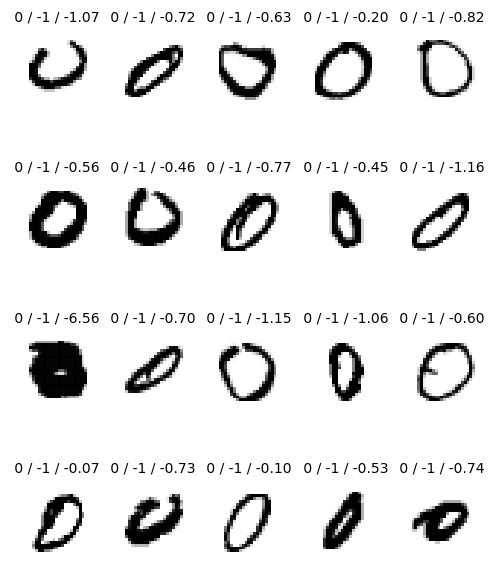

In [40]:
image_size = 1.5
nrows = 4
ncols = 5
inds = np.array(indices_false_zeros, dtype = int)
false_zeros_images = test_images[inds]
false_zeros_fs = f_pred[inds]
false_zeros_y_test_pred = y_test_pred[inds]

images_fs = []
i = 0
for image in false_zeros_images:
    images_fs.append([image, false_zeros_fs[i]])
    i += 1

_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(image_size * nrows, image_size * ncols))
for ax, image_f, label in zip(axes.ravel(), images_fs, false_zeros_y_test_pred):
    ax.set_axis_off()
    image = image_f[0]
    value = image_f[1]
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(" %i / %i / %.2f" % (label[0], label[1], value))
                                      
plt.savefig("non_zero_zeros.jpg")

(7291, 256)


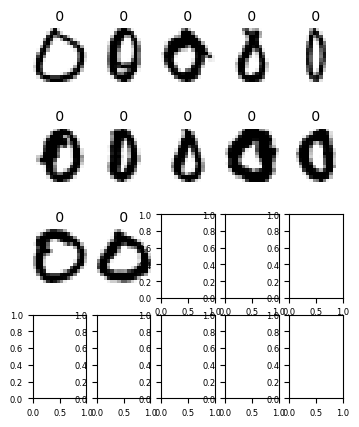

In [61]:
import h5py
path = 'datasets/usps.h5'
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]
        

print(X_tr.shape)

n_samples = len(X_tr)
pixel_width = 16
pixel_height = 16
X_tr_images = X_tr.reshape((n_samples, pixel_width, pixel_height))
image_size = 1
n_rows = 3
n_cols = 3

def print_images(n_rows, n_cols, image_size, images, labels):
    plt.close()
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(image_size * nrows, image_size * ncols))
    for ax, image, label in zip(axes.ravel(), images[:n_rows * n_cols], labels[:nrows * n_cols]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(" %i " % (label))
        
#print_images(n_rows, n_cols, image_size, X_tr_images, y_tr)
    
zeros = X_tr[y_tr == 0]
n_zeros = len(zeros)
zero_images = zeros.reshape((n_zeros, pixel_width, pixel_height))
zero_labels = y_tr[y_tr == 0]
print_images(nrows, n_cols, image_size, zero_images, zero_labels)




In [43]:
import random
n_zeros = 2000
n_test = 1000
random.seed(40)
test_start = random.randint(, 50000)
x_train = zeros[:n_zeros]
x_test = data[test_start:test_start + n_test]
y_test = target[test_start:test_start + n_test]

scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

x_train_scaled = x_train
x_test_scaled = x_test


c = 0.5 * 256
nu = 0.05

osvm = svm.OneClassSVM(nu = nu, kernel = "rbf")
osvm.fit(x_train_scaled)
y_pred = osvm.predict(x_test_scaled)
f_pred = osvm.decision_function(x_test_scaled)
print("Decision function value on test data: ", f_pred[0])
#print(y_pred)

test_images = x_test.reshape((n_test, 28, 28))

# Customize font settings (e.g., using 'serif' font)
plt.rcParams.update({
    'font.family': 'sans-serif',     # Font family (serif, sans-serif, etc.)
    'font.size': 12,            # Font size
    'font.weight': 'normal',      # Font weight (normal, bold, etc.)
    'axes.titlesize': 10,       # Title font size
    'axes.labelsize': 10,       # Axis labels font size
    'xtick.labelsize': 6,      # X-axis tick label size
    'ytick.labelsize': 6       # Y-axis tick label size
})


y_test_pred = []

for i in range(n_test):
    y_test_pred.append([int(y_test[i]), y_pred[i]])

y_test_pred = np.array(y_test_pred)
    
#image_size = 1
#nrows = 2
#ncols = 2
#_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(image_size * nrows, image_size * ncols))
#for ax, image, label in zip(axes.ravel(), test_images, y_test_pred):
#    ax.set_axis_off()
#    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#    ax.set_title(" %i / %i" % (label[0], label[1]))
    

#image_size = 1
#nrows = 2
#ncols = 2
#zeros_test = test_images[y_test == '0']
#zeros_y_test = y_test[y_test == '0']
#_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(image_size * nrows, image_size * ncols))
#for ax, image, label in zip(axes.ravel(), zeros_test, zeros_y_test):
#    ax.set_axis_off()
#    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#    ax.set_title(label)
    
y_test_anomaly = []
for y in y_test:
    normal_class = 1
    if y != '0':
        normal_class = -1
    y_test_anomaly.append(normal_class)
    
# Fraction of 0s correctly identified
n_zeros_test = len(y_test[y_test == '0'])
i = 0
true_zero = 0
indices_true_zeros = []
indices_false_zeros = []
for y in y_test:
    if y == '0' and y_pred[i] == 1:
        true_zero += 1
        indices_true_zeros.append(i)
    if y == '0' and y_pred[i] == -1:
        indices_false_zeros.append(i)
    i += 1
    

fraction = true_zero / n_zeros_test
print("Total number of 0s in test set: ", n_zeros_test)
print("Number of 0s wrongly classified as non-zero: ", n_zeros_test - true_zero)
print("Fraction of 0's correctly identified: ", fraction)

    
#print(y_test[:10])
#print(y_test_anomaly[:10])

#confusion_matrix(y_test_anomaly, y_pred, normalize= 'true')
metrics = classification_report(y_test_anomaly, y_pred, target_names = ['normal class', 'outlier class'], labels = [1, -1])
print(metrics)





        



Decision function value on test data:  -0.7877541063681797
Total number of 0s in test set:  315
Number of 0s wrongly classified as non-zero:  22
Fraction of 0's correctly identified:  0.9301587301587302
               precision    recall  f1-score   support

 normal class       0.79      0.93      0.85       315
outlier class       0.99      0.97      0.98      2685

     accuracy                           0.97      3000
    macro avg       0.89      0.95      0.92      3000
 weighted avg       0.97      0.97      0.97      3000

